# Übungsaufgaben
Importieren Sie zuerst die benötigten Module und Tests für die Übungsaufgaben.

In [ ]:
import pandas as pd

## Aufgabe 1
Laden Sie den Datensatz `disney_plus_titles.csv`.

In [ ]:
df = pd.read_csv('disney_plus_titles.csv')
df

Fügen Sie eine Spalte `avg_runtime` hinzu. Diese enthält bei Filmen die Laufzeit aus der Spalte `runtime`. Bei Serien soll die Spalte die Laufzeit (`runtime`) geteilt durch die Anzahl der Episoden (`episode_count`) enthalten.

In [ ]:
df['avg_runtime'] = df['runtime'] / df['episode_count'].fillna(1)
df

## Aufgabe 2
Diskretisieren Sie folgende Spalten:
1. `release` in Monate
2. `avg_runtime` in Intervalle:
  - `kurz`: $[0, 30)$
  - `mittel`: $[30, 70)$
  - `lang`: $[70, \infty]$

In [ ]:
df_discrete = df.copy()

df_discrete['release'] = df_discrete['release'].str[:7]
df_discrete['avg_runtime'] = pd.cut(df_discrete['avg_runtime'],
                                   (0, 30, 70, df_discrete['avg_runtime'].max()),
                                   labels=('kurz', 'mittel', 'lang'))

df_discrete

Erstellen Sie einen Ergebniswürfel mit den Dimensionen Veröffentlichungszeitpunkt (`release`), durchschnittliche Laufzeit (`avg_runtime`), Anzahl der Episoden (`episode_count`) und Typ (`type`). Die relevante Kennzahl ist die maximale Beliebtheit (`popularity`).

In [ ]:
result_cube = df_discrete.groupby(['release', 'avg_runtime', 'episode_count', 'type'])['popularity'].max()
result_cube

## Aufgabe 3
Drehen Sie den Ergebniswürfel, sodass die Dimensionen in der Reihenfolge Typ (`type`), Veröffentlichungszeitpunkt (`release`), Anzahl der Episoden (`episode_count`) und durchschnittliche Laufzeit (`avg_runtime`) sind.

In [ ]:
rotated_cube = result_cube.swaplevel(i=0, j=1).swaplevel(i=0, j=3)
rotated_cube

## Aufgabe 4
Schneiden Sie eine "Scheibe" vom Ergebniswürfel `rotated_cube` ab. Das Ergebnis soll ausschließlich Serien beinhalten, aber keine Filme. Die anderen Dimensionen verbleiben unverändert.

In [ ]:
sliced_cube = rotated_cube['TV Show']
sliced_cube

## Aufgabe 5
Fassen Sie die Werte des Würfels aus der vorigen Aufgabe `sliced_cube` zusammen. `release` soll dabei auf Jahresebene gespeichert werden, während `episode_count` und `avg_runtime` gleich bleiben.

In [ ]:
rolled_cube = sliced_cube.groupby([lambda x: x[0][:4], 'episode_count', 'avg_runtime']).max()
rolled_cube

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[![TMDb Logo]( 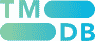)](https://developers.themoviedb.org/3)